In [57]:
import pandas as pd
import yfinance as yf
import numpy as np
from isyatirimhisse import fetch_data, fetch_financials, visualize_data

In [58]:
tuprs=yf.download("TUPRS.IS",start="2018-01-01",end="2023-10-01")


[*********************100%%**********************]  1 of 1 completed


In [59]:
symbol='TUPRS'
start_year='2016'
end_year='2023'
save_to_excel=True
language='tr'

veri = fetch_financials(
    symbol=symbol,
    start_year=start_year,
    end_year=end_year,
    save_to_excel=save_to_excel,
    language=language
)
bilanco=pd.read_excel("finansallar_TUPRS_20231001.xlsx")
bilanco=bilanco.T


In [60]:
bilanco.columns=bilanco.iloc[1]
bilanco=bilanco.drop([bilanco.index[0],bilanco.index[1]])
bilanco["Çeyreklik Kar"]=0


In [61]:
for i in range(1,30):
   if i%4==0:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]
   else:
      bilanco["Çeyreklik Kar"].iloc[i]=bilanco["DÖNEM KARI (ZARARI)"].iloc[i]-bilanco["DÖNEM KARI (ZARARI)"].iloc[i-1]
bilanco["Çeyreklik Kar"]

2016/3               0
2016/6       335011000
2016/9       585738000
2016/12      808927000
2017/3       875759000
2017/6      1463521000
2017/9       999818000
2017/12      501458000
2018/3       386787000
2018/6      1035290000
2018/9       550687000
2018/12     1788681000
2019/3      -362295000
2019/6       885904000
2019/9      -140172000
2019/12      201893000
2020/3     -2249085000
2020/6      -162291000
2020/9      -394966000
2020/12      383417000
2021/3      -652256000
2021/6      1722416000
2021/9      1066251000
2021/12     1476813000
2022/3      1145064000
2022/6     10853901000
2022/9     11618668000
2022/12    17642934000
2023/3      6792657000
2023/6      7331480000
Name: Çeyreklik Kar, dtype: int64

In [62]:
bilanco["Yıllıklandırılmış Kar"]=bilanco["Çeyreklik Kar"].rolling(4).sum()
bilanco=bilanco.dropna()
bilanco["Yıllıklandırılmış Kar"]

2018/3     3.351584e+09
2018/6     2.923353e+09
2018/9     2.474222e+09
2018/12    3.761445e+09
2019/3     3.012363e+09
2019/6     2.862977e+09
2019/9     2.172118e+09
2019/12    5.853300e+08
2020/3    -1.301460e+09
2020/6    -2.349655e+09
2020/9    -2.604449e+09
2020/12   -2.422925e+09
2021/3    -8.260960e+08
2021/6     1.058611e+09
2021/9     2.519828e+09
2021/12    3.613224e+09
2022/3     5.410544e+09
2022/6     1.454203e+10
2022/9     2.509445e+10
2022/12    4.126057e+10
2023/3     4.690816e+10
2023/6     4.338574e+10
Name: Yıllıklandırılmış Kar, dtype: float64

<Axes: title={'center': 'Yıllık Kar'}>

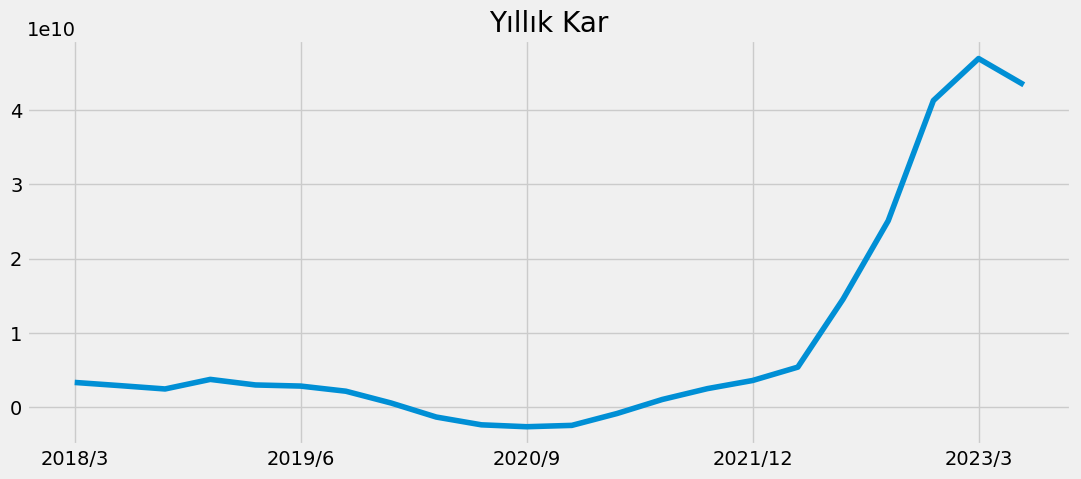

In [63]:
bilanco["Yıllıklandırılmış Kar"].plot(kind="line",figsize=(12,5),title="Yıllık Kar")




In [64]:
fiyat=pd.DataFrame()
dönem=pd.date_range(start="2018-03-30",end="2023-10-01",freq="Q")
fiyat["Fiyat"]=tuprs["Close"].resample("Q").last()



# Güncellenmiş DataFrame'i gösterelim
fiyat

,Fiyat
Date,
2018-03-31,15.542857
2018-06-30,15.485714
2018-09-30,19.085714
2018-12-31,16.642857
2019-03-31,17.814285
2019-06-30,16.400000
2019-09-30,20.514284
2019-12-31,18.085714
2020-03-31,10.835714


In [65]:
dönem=pd.date_range(start="2018-03-30",end="2023-07-01",freq="Q")
bilanco=bilanco.set_index(dönem)
bilanco

TUPRS,Dönen Varlıklar,Nakit ve Nakit Benzerleri,Finansal Yatırımlar,Ticari Alacaklar,Finans Sektörü Faaliyetlerinden Alacaklar,Diğer Alacaklar,Stoklar,Canlı Varlıklar,Diğer Dönen Varlıklar,(Ara Toplam),...,Müşteri Sözleşmelerinden Doğan Varlıklar,Müşteri Sözleşmelerinden Doğan Varlıklar,Kullanım Hakkı Varlıkları,Müşteri Söz. Doğan Yük.,Ertelenmiş Gelirler (Müşteri Söz. Doğan Yük. Dış.Kal.),Müşteri Söz.Doğan Yük.,Ertelenmiş Gelirler (Müşteri Söz.Doğan Yük. Dış.Kal.),Finansman Gideri Öncesi Faaliyet Karı/Zararı,Çeyreklik Kar,Yıllıklandırılmış Kar
2018-03-31,20311172000,6716597000,0,5495351000,0,95708000,6716365000,0,1287151000,20311172000,...,0,0,0,0,0,0,0,742391000,386787000,3.351584e+09
2018-06-30,21951521000,5886217000,0,6768881000,0,169479000,7702377000,0,1424567000,21951521000,...,0,0,0,0,0,0,0,1894425000,1035290000,2.923353e+09
2018-09-30,30250105000,9957795000,0,9319393000,0,102835000,8495315000,0,2374767000,30250105000,...,0,0,0,0,0,0,0,2743321000,550687000,2.474222e+09
2018-12-31,20962205000,5982828000,0,5428738000,0,29048000,6764745000,0,2756846000,20962205000,...,0,0,0,0,4878000,0,3638000,5992802000,1788681000,3.761445e+09
2019-03-31,28061876000,11328854000,0,6429066000,0,90855000,8410339000,0,1802762000,28061876000,...,0,0,197898000,0,6856000,0,6102000,291064000,-362295000,3.012363e+09
2019-06-30,29730712000,9889401000,0,8699923000,0,58621000,8384370000,0,2698397000,29730712000,...,0,0,194004000,0,14145000,0,7854000,1670500000,885904000,2.862977e+09
2019-09-30,28945418000,10106005000,0,6063377000,0,64775000,9488710000,0,3222551000,28945418000,...,0,0,210639000,0,10043000,0,7593000,2341383000,-140172000,2.172118e+09
2019-12-31,27918955000,10652009000,0,4787906000,0,45617000,9468581000,0,2964842000,27918955000,...,0,0,200701000,0,20813000,0,7820000,2427378000,201893000,5.853300e+08
2020-03-31,22938512000,10995278000,0,4422517000,0,64655000,5300465000,0,2155597000,22938512000,...,0,0,195416000,0,4118000,0,8347000,-1884615000,-2249085000,-1.301460e+09
2020-06-30,27389948000,18177886000,0,1721218000,0,46082000,5503471000,0,1941291000,27389948000,...,0,0,182686000,0,44803000,0,10545000,-1663474000,-162291000,-2.349655e+09


In [66]:
df1=pd.DataFrame(fiyat.head(22))
df1["Ödenmiş Sermaye"]=bilanco["Ödenmiş Sermaye"].astype(float)
df1["Özkaynak"]=bilanco["Özkaynaklar"].astype(float)
df1["Duran Varlıklar"]=bilanco["Duran Varlıklar"].astype(float)
df1["Dönen Varlıklar"]=bilanco["Dönen Varlıklar"].astype(float)
df1["Kısa Vadeli Yükümlülükler"]=bilanco["Kısa Vadeli Yükümlülükler"].astype(float)
df1["Uzun Vadeli Yükümlülükler"]=bilanco["Uzun Vadeli Yükümlülükler"].astype(float)
df1["Toplam Yükümlülük"]=df1["Kısa Vadeli Yükümlülükler"]+df1["Uzun Vadeli Yükümlülükler"]
df1["Çeyreklik Kar"]=bilanco["Çeyreklik Kar"].astype(float)
df1["Yıllıklandırılmış Kar"]=bilanco["Yıllıklandırılmış Kar"].astype(float)
df1["HBK"]=df1["Yıllıklandırılmış Kar"]/df1["Ödenmiş Sermaye"]
df1["Toplam Varlıklar"]=df1["Duran Varlıklar"]+df1["Dönen Varlıklar"]
df1





,Fiyat,Ödenmiş Sermaye,Özkaynak,Duran Varlıklar,Dönen Varlıklar,Kısa Vadeli Yükümlülükler,Uzun Vadeli Yükümlülükler,Toplam Yükümlülük,Çeyreklik Kar,Yıllıklandırılmış Kar,HBK,Toplam Varlıklar
Date,,,,,,,,,,,,
2018-03-31,15.542857,2.504190e+08,7.341450e+09,1.787333e+10,2.031117e+10,2.106889e+10,9.774157e+09,3.084305e+10,3.867870e+08,3.351584e+09,13.383905,3.818450e+10
2018-06-30,15.485714,2.504190e+08,8.052826e+09,1.825045e+10,2.195152e+10,2.072457e+10,1.142458e+10,3.214914e+10,1.035290e+09,2.923353e+09,11.673847,4.020197e+10
2018-09-30,19.085714,2.504190e+08,7.517618e+09,1.881608e+10,3.025010e+10,2.709297e+10,1.445560e+10,4.154857e+10,5.506870e+08,2.474222e+09,9.880329,4.906618e+10
2018-12-31,16.642857,2.504190e+08,9.945829e+09,1.907352e+10,2.096220e+10,1.594954e+10,1.414036e+10,3.008990e+10,1.788681e+09,3.761445e+09,15.020605,4.003573e+10
2019-03-31,17.814285,2.504190e+08,1.181468e+10,2.554416e+10,2.806188e+10,2.514518e+10,1.664619e+10,4.179136e+10,-3.622950e+08,3.012363e+09,12.029291,5.360604e+10
2019-06-30,16.400000,2.504190e+08,1.302556e+10,2.655035e+10,2.973071e+10,2.699196e+10,1.626355e+10,4.325550e+10,8.859040e+08,2.862977e+09,11.432747,5.628106e+10
2019-09-30,20.514284,2.504190e+08,1.299984e+10,2.673530e+10,2.894542e+10,2.735773e+10,1.532315e+10,4.268088e+10,-1.401720e+08,2.172118e+09,8.673934,5.568072e+10
2019-12-31,18.085714,2.504190e+08,1.313654e+10,2.759260e+10,2.791896e+10,2.812027e+10,1.425475e+10,4.237502e+10,2.018930e+08,5.853300e+08,2.337403,5.551156e+10
2020-03-31,10.835714,2.504190e+08,1.079117e+10,2.801768e+10,2.293851e+10,2.470684e+10,1.545818e+10,4.016502e+10,-2.249085e+09,-1.301460e+09,-5.197130,5.095619e+10


In [67]:
X=df1[["Ödenmiş Sermaye","Özkaynak","Toplam Varlıklar","Toplam Yükümlülük","Çeyreklik Kar","HBK","Dönen Varlıklar","Duran Varlıklar","Kısa Vadeli Yükümlülükler","Uzun Vadeli Yükümlülükler","Yıllıklandırılmış Kar"]]
y=df1["Fiyat"]

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=3)  # 10 ana bileşen seç, bu sayıyı değiştirebilirsin
principal_components = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.76402008, 0.10936523, 0.073839  ])

In [69]:
X=principal_components
y=df1["Fiyat"]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm



# Modeli eğitin



results = model.fit(X_train, y_train)

# Modelin özetini görüntüleyin
results.score(X_train,y_train)

0.9677968386893779

In [72]:
tahmin1=pd.DataFrame(results.predict(X_test),columns=["Tahmin"],index=y_test.index)
tahmin1["Gerçek"]=y_test
tahmin1=tahmin1.sort_index()
tahmin1

,Tahmin,Gerçek
Date,,
2018-03-31,17.403332,15.542857
2018-06-30,17.607139,15.485714
2018-12-31,19.295152,16.642857
2019-06-30,19.517742,16.400000
2020-03-31,14.473873,10.835714
2020-12-31,16.045798,15.528571
2021-06-30,18.318188,13.535714
2021-12-31,22.367809,22.057142
2023-03-31,69.803862,75.728569


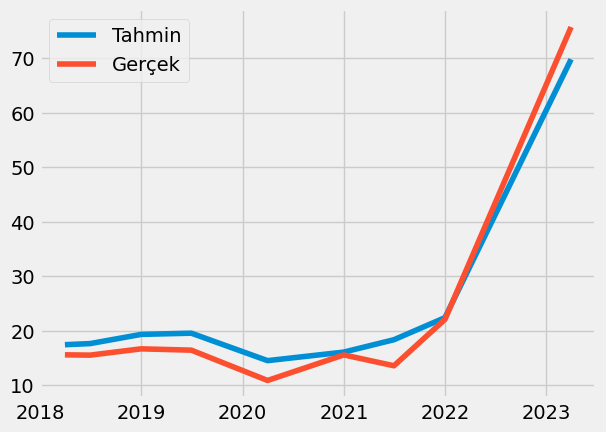

In [73]:
import matplotlib.pyplot as plt
plt.plot(tahmin1["Tahmin"],label="Tahmin")
plt.plot(tahmin1["Gerçek"],label="Gerçek")
plt.legend()

In [74]:
X=df1[["Ödenmiş Sermaye","Özkaynak","Toplam Yükümlülük","Çeyreklik Kar","HBK","Dönen Varlıklar","Duran Varlıklar","Kısa Vadeli Yükümlülükler","Uzun Vadeli Yükümlülükler","Yıllıklandırılmış Kar"]]
y=df1["Fiyat"]

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np


# Tahminleri saklamak için bir liste
predictions = []

# Her bir sütun için döngü
for i in range(0,10):  
    # SARIMAX modelini oluşturma
    sarimax_model = SARIMAX(X.iloc[:, i], 
                            order=(0, 1, 1), 
                            seasonal_order=(0, 1, 1, 4))  # Çeyreklik veri için mevsimsel periyot 4

    # Modeli eğitme
    sarimax_fit = sarimax_model.fit(disp=False)

    # Modelin özeti (isteğe bağlı)
    print(sarimax_fit.summary())

    # Gelecekteki 6 değeri tahmin etme
    future_predictions = sarimax_fit.get_forecast(steps=6).predicted_mean

    # Tahminleri listeye ekleme
    predictions.append(future_predictions)

# Tahminleri bir DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions).T  # Transpoze alarak sütunlarla satırları ters çeviriyoruz
predictions_df.columns = X.columns  # Sütun adlarını X DataFrame'inden alıyoruz


extended_X = pd.concat([X, predictions_df], ignore_index=True)



                                     SARIMAX Results                                     
Dep. Variable:                   Ödenmiş Sermaye   No. Observations:                   22
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -360.838
Date:                           Sun, 01 Oct 2023   AIC                            727.677
Time:                                   18:15:51   BIC                            730.176
Sample:                               03-31-2018   HQIC                           727.925
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6904      1.251      0.552      0.581      -1.761       3.142
ma.S.L4        0.0573      7.310      0.008

In [76]:
extended_X=extended_X.set_index(pd.date_range(start="2018-03-31",end="2025-01-01",freq="Q"))
extended_X["Yıllıklandırılmış Kar"]=extended_X["Çeyreklik Kar"].rolling(4).sum()
extended_X["HBK"]=extended_X["Yıllıklandırılmış Kar"]/extended_X["Ödenmiş Sermaye"]
extended_X=extended_X.dropna()
extended_X

,Ödenmiş Sermaye,Özkaynak,Toplam Yükümlülük,Çeyreklik Kar,HBK,Dönen Varlıklar,Duran Varlıklar,Kısa Vadeli Yükümlülükler,Uzun Vadeli Yükümlülükler,Yıllıklandırılmış Kar
2018-12-31,2.504190e+08,9.945829e+09,3.008990e+10,1.788681e+09,15.020605,2.096220e+10,1.907352e+10,1.594954e+10,1.414036e+10,3.761445e+09
2019-03-31,2.504190e+08,1.181468e+10,4.179136e+10,-3.622950e+08,12.029291,2.806188e+10,2.554416e+10,2.514518e+10,1.664619e+10,3.012363e+09
2019-06-30,2.504190e+08,1.302556e+10,4.325550e+10,8.859040e+08,11.432747,2.973071e+10,2.655035e+10,2.699196e+10,1.626355e+10,2.862977e+09
2019-09-30,2.504190e+08,1.299984e+10,4.268088e+10,-1.401720e+08,8.673934,2.894542e+10,2.673530e+10,2.735773e+10,1.532315e+10,2.172118e+09
2019-12-31,2.504190e+08,1.313654e+10,4.237502e+10,2.018930e+08,2.337403,2.791896e+10,2.759260e+10,2.812027e+10,1.425475e+10,5.853300e+08
2020-03-31,2.504190e+08,1.079117e+10,4.016502e+10,-2.249085e+09,-5.197130,2.293851e+10,2.801768e+10,2.470684e+10,1.545818e+10,-1.301460e+09
2020-06-30,2.504190e+08,1.032834e+10,4.522286e+10,-1.622910e+08,-9.382894,2.738995e+10,2.816125e+10,2.644354e+10,1.877932e+10,-2.349655e+09
2020-09-30,2.504190e+08,9.870505e+09,4.374363e+10,-3.949660e+08,-10.400365,2.505385e+10,2.856028e+10,2.188961e+10,2.185402e+10,-2.604449e+09
2020-12-31,2.752570e+08,1.292543e+10,5.068880e+10,3.834170e+08,-8.802410,3.128176e+10,3.233247e+10,2.876643e+10,2.192236e+10,-2.422925e+09
2021-03-31,2.504190e+08,1.072768e+10,5.905944e+10,-6.522560e+08,-3.298855,3.909123e+10,3.069589e+10,3.886958e+10,2.018986e+10,-8.260960e+08


In [77]:
X=extended_X[["Ödenmiş Sermaye","Özkaynak","Toplam Yükümlülük","Çeyreklik Kar","HBK","Dönen Varlıklar","Duran Varlıklar","Kısa Vadeli Yükümlülükler","Uzun Vadeli Yükümlülükler","Yıllıklandırılmış Kar"]]

In [78]:


# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=5)  
principal_components1 = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.7521414 , 0.16530152, 0.04773518, 0.01610426, 0.00876795])

In [79]:
y=df1["Fiyat"]
y.loc[pd.Timestamp('2023-09-30')] = 159
y=y.tail(20)
y

Date
2018-12-31     16.642857
2019-03-31     17.814285
2019-06-30     16.400000
2019-09-30     20.514284
2019-12-31     18.085714
2020-03-31     10.835714
2020-06-30     12.857142
2020-09-30     11.385714
2020-12-31     15.528571
2021-03-31     12.857142
2021-06-30     13.535714
2021-09-30     16.371428
2021-12-31     22.057142
2022-03-31     30.628571
2022-06-30     37.785713
2022-09-30     41.371429
2022-12-31     75.699997
2023-03-31     75.728569
2023-06-30     79.300003
2023-09-30    159.000000
Freq: Q-DEC, Name: Fiyat, dtype: float64

In [80]:
model=LinearRegression()
model.fit(principal_components1[:20],y)
model.score(principal_components1[:20],y)

0.9814895563235547

In [81]:
tahmin3=pd.DataFrame(model.predict(principal_components1),index=pd.date_range(start="2018-12-31",end="2025-01-01",freq="Q"),columns=["Tahmin"])
tahmin3

,Tahmin
2018-12-31,9.364467
2019-03-31,13.843729
2019-06-30,17.719812
2019-09-30,20.552071
2019-12-31,25.282494
2020-03-31,20.808549
2020-06-30,12.109826
2020-09-30,4.557943
2020-12-31,13.988244
2021-03-31,11.018657


In [82]:
y

Date
2018-12-31     16.642857
2019-03-31     17.814285
2019-06-30     16.400000
2019-09-30     20.514284
2019-12-31     18.085714
2020-03-31     10.835714
2020-06-30     12.857142
2020-09-30     11.385714
2020-12-31     15.528571
2021-03-31     12.857142
2021-06-30     13.535714
2021-09-30     16.371428
2021-12-31     22.057142
2022-03-31     30.628571
2022-06-30     37.785713
2022-09-30     41.371429
2022-12-31     75.699997
2023-03-31     75.728569
2023-06-30     79.300003
2023-09-30    159.000000
Freq: Q-DEC, Name: Fiyat, dtype: float64

In [83]:
tahmin3.index = pd.to_datetime(tahmin3.index)
tahmin3.index = tahmin3.index.date
y.index = pd.to_datetime(y.index)
y.index = y.index.date

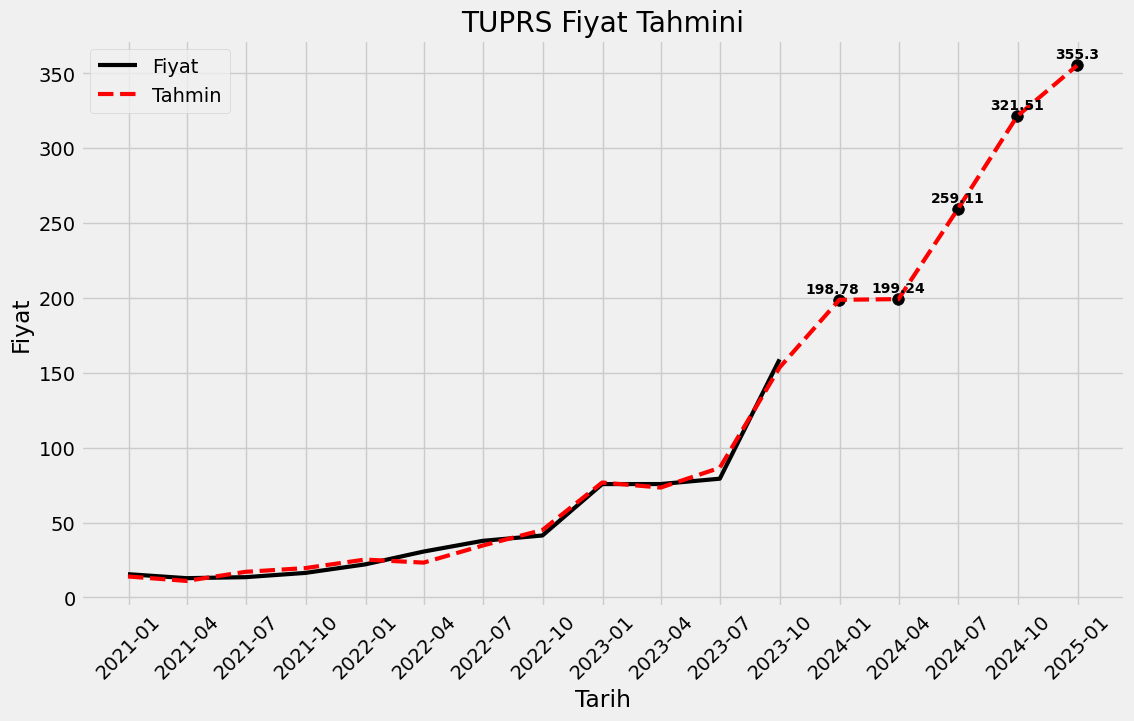

In [84]:
import matplotlib.dates as mdates
y.tail(12).plot(figsize=(12,7),label="Fiyat",color="black",linestyle="-",lw=3)
tahmin3["Tahmin"].tail(17).plot(label="Tahmin",color="red",linestyle="--",lw=3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))  # Çeyrekler için ay ayırıcıları
plt.xticks(rotation=45)
plt.scatter(tahmin3.index[-5::],tahmin3["Tahmin"][-5::],color="black",marker="o",s=70)
plt.title("TUPRS Fiyat Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")

for i in range(-5,-4):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(-5,5), ha='center',weight="bold",fontsize=10)
for i in range(-4,0):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',fontsize=10,weight="bold")


plt.legend()
plt.show()